# Checking FYs for JEFF-4.0

In [1]:
import sandy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

In [65]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv("FY_JEFF4_somenuclides.csv", index_col=0)
dferr = pd.read_csv("DFY_JEFF4_somenuclides.csv", index_col=0)

In [68]:
nuclides = [380900, 551370, 601430, 601450, 601440,  601450,  601460,  601470,  601480,  601500]

In [69]:
fy = sandy.get_endf6_file("jeff_33", "nfpy", 922350)
d = sandy.Fy.from_endf6(fy).data.query("MT==459 & E==2.53e-2")
d_33 = d[d.ZAP.isin(nuclides)].assign(LIB="JEFF-3.3")

In [70]:
fy = sandy.get_endf6_file("jeff_311", "nfpy", 922350)
d = sandy.Fy.from_endf6(fy).data.query("MT==459 & E==2.53e-2")
d_311 = d[d.ZAP.isin(nuclides)].assign(LIB="JEFF-3.1.1")

In [71]:
data = pd.concat([
    d_311,
    d_33,
], ignore_index=True)

In [72]:
vals = data.query("ZAM==922350").pivot_table(index="LIB", columns="ZAP", values="FY")
vals.columns = pd.Index(map(sandy.zam.zam2nuclide, vals.columns), name="ZAP")
vals = pd.concat([df, vals])
vals

,Sr90,Cs137,Nd143,Nd144,Nd145,Nd146,Nd147,Nd148,Nd150
C1,5.80630e-02,6.24810e-02,5.94200e-02,5.48620e-02,4.02620e-02,2.99250e-02,2.25340e-02,1.67810e-02,6.59650e-03
C2,5.80760e-02,6.24960e-02,5.94340e-02,5.48750e-02,4.02720e-02,2.99320e-02,2.25400e-02,1.67850e-02,6.59810e-03
S1,5.85720e-02,6.13080e-02,6.03020e-02,5.57220e-02,3.91640e-02,2.99860e-02,2.20250e-02,1.67380e-02,6.54300e-03
S2,5.84790e-02,6.34350e-02,6.04910e-02,5.58450e-02,4.10490e-02,2.98430e-02,2.19110e-02,1.66440e-02,6.51250e-03
JEFF-3.1.1,5.72900e-02,6.22080e-02,5.95410e-02,5.47450e-02,3.94390e-02,2.98660e-02,2.23200e-02,1.68080e-02,6.50740e-03
JEFF-3.3,5.67590e-02,6.08970e-02,5.95220e-02,5.47810e-02,3.95600e-02,2.99690e-02,2.24650e-02,1.69270e-02,6.53770e-03


In [73]:
err = data.query("ZAM==922350").pivot_table(index="LIB", columns="ZAP", values="DFY")
err.columns = pd.Index(map(sandy.zam.zam2nuclide, err.columns), name="ZAP")
err = pd.concat([dferr, err])
err

,Sr90,Cs137,Nd143,Nd144,Nd145,Nd146,Nd147,Nd148,Nd150
C1,1.48610e-03,1.69910e-03,1.38230e-03,1.27600e-03,9.76960e-04,7.90950e-04,6.25390e-04,4.99110e-04,2.24250e-04
C2,1.48640e-03,1.69950e-03,1.38260e-03,1.27640e-03,9.77230e-04,7.91160e-04,6.25560e-04,4.99250e-04,2.24320e-04
S1,5.93400e-04,6.23250e-04,3.87880e-04,3.70330e-04,2.67440e-04,2.47710e-04,1.54650e-04,1.48630e-04,8.92000e-05
S2,5.91850e-04,6.93410e-04,4.97250e-04,4.76990e-04,4.17630e-04,3.87230e-04,1.74200e-04,2.06220e-04,1.28300e-04
JEFF-3.1.1,1.31920e-03,6.93580e-04,8.33760e-04,5.47200e-04,4.34030e-04,2.98670e-04,4.01760e-04,1.17600e-04,6.50750e-05
JEFF-3.3,1.30680e-03,6.32840e-04,7.14390e-04,4.92120e-04,3.96460e-04,2.99710e-04,3.81910e-04,1.18300e-04,6.53910e-05


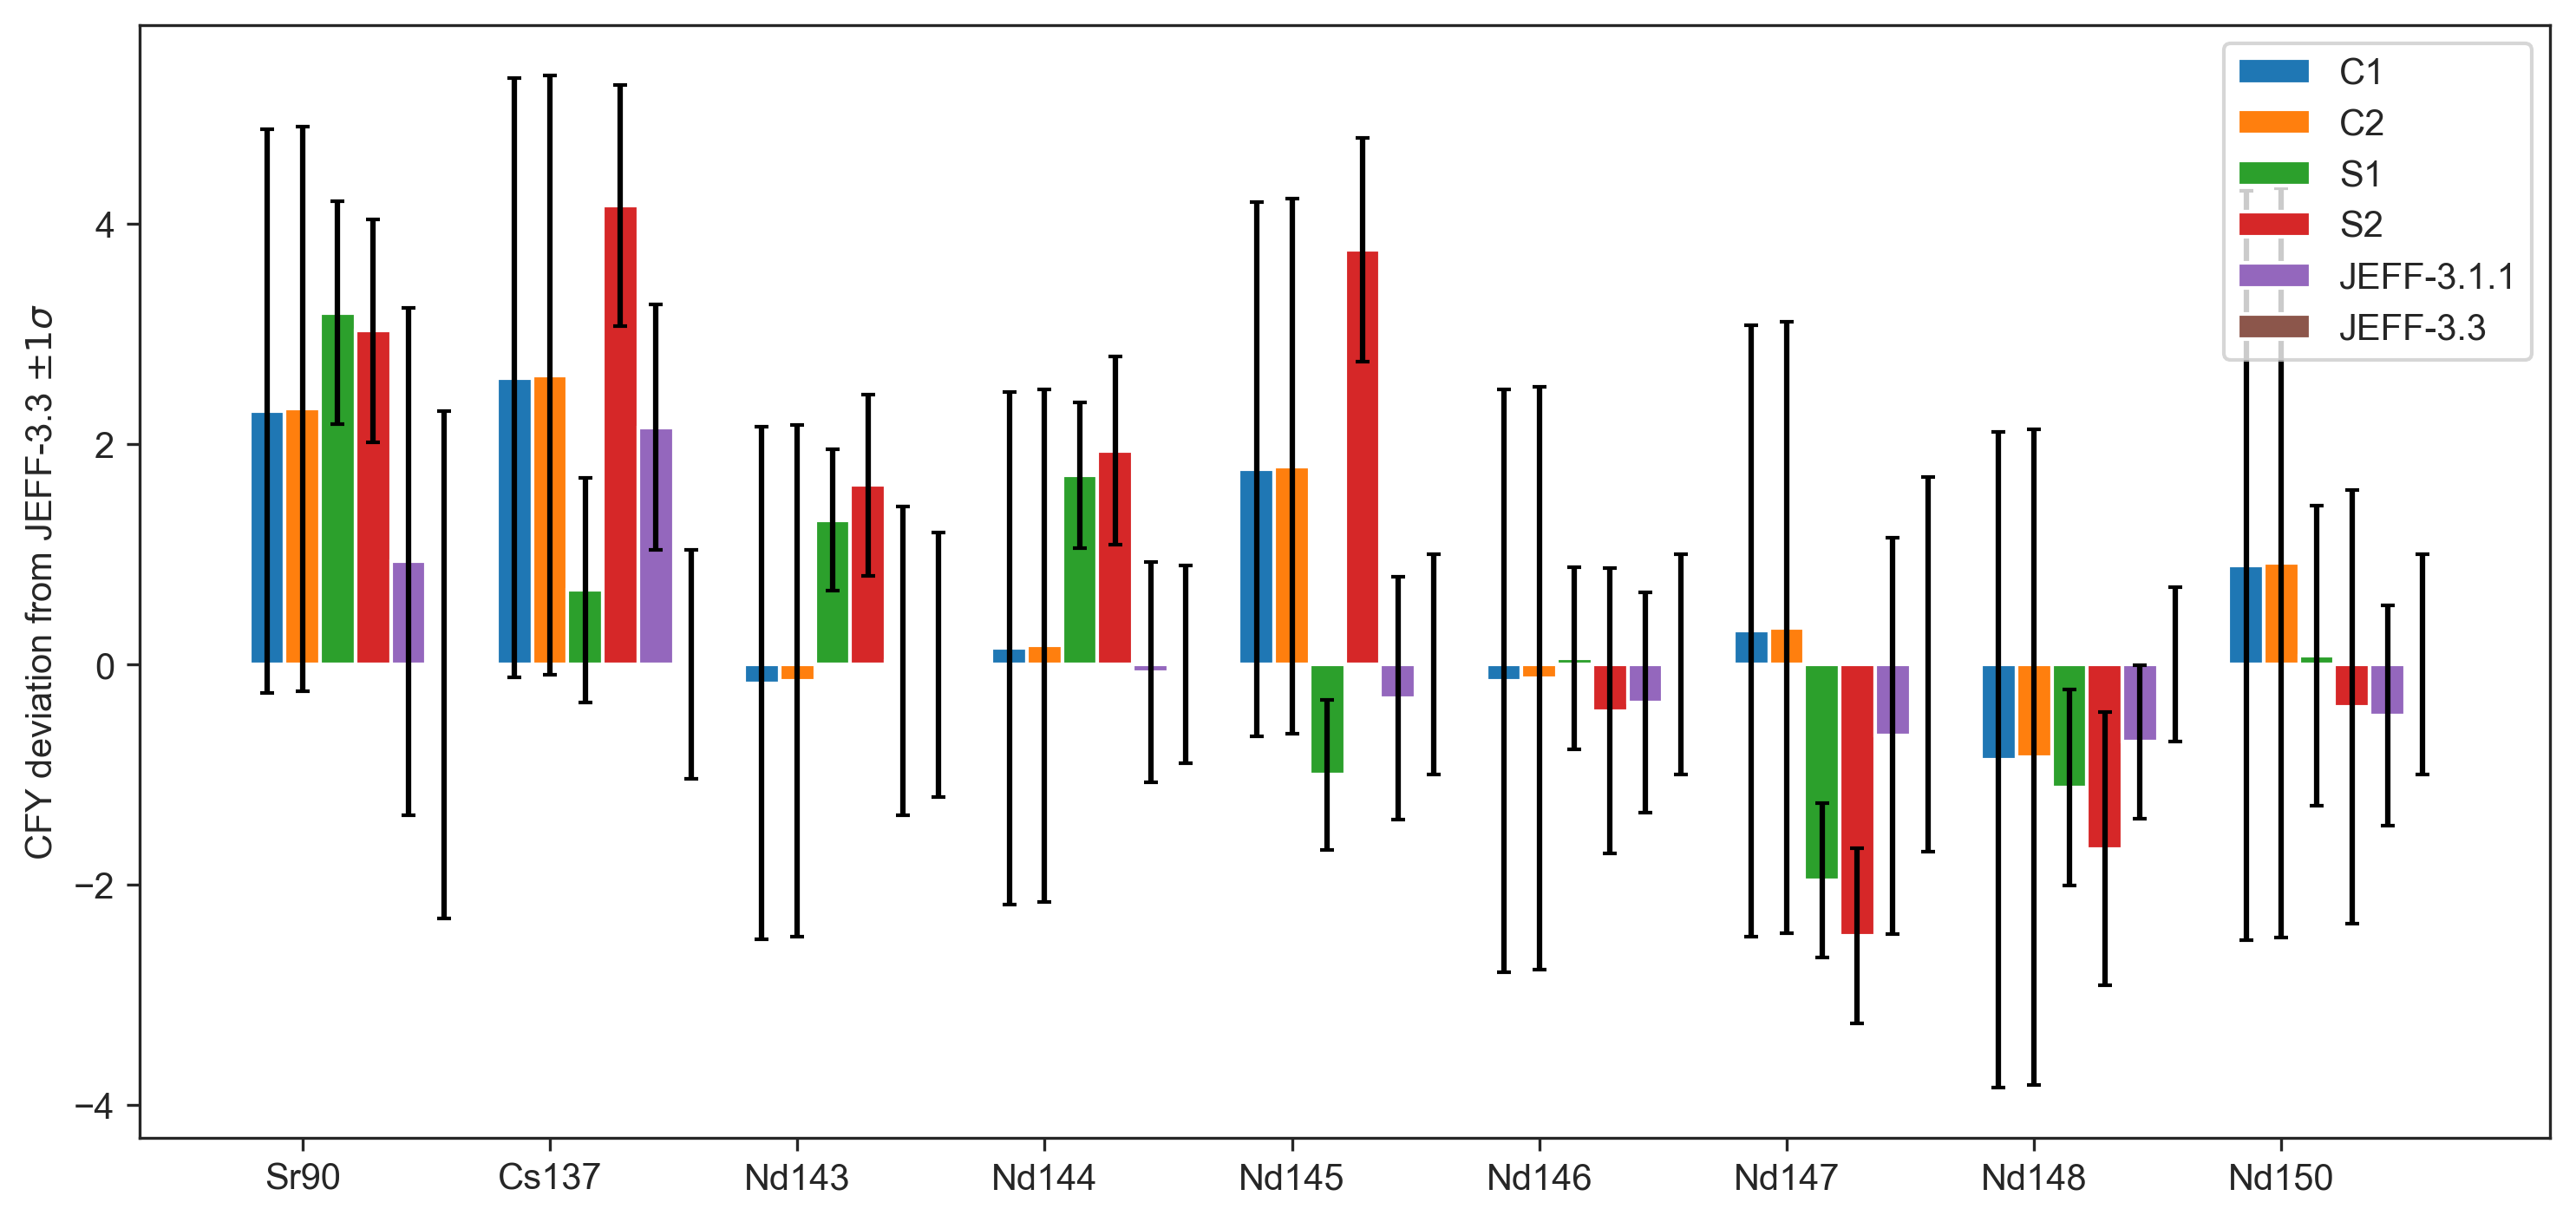

In [118]:
%%capture --no-display
fig, ax = plt.subplots(figsize=(10, 4.8), dpi=300)

vals2 = (vals/vals.iloc[-1] - 1)*100 
err2 = err/vals.iloc[-1]*100
err2 = err/vals*100
step = 1 / (vals2.T.columns.size + 1)
for i, LIB in enumerate(vals2.T.columns):
    x = np.arange(vals2.T[LIB].shape[0])
    ax.bar(data=vals2.T[LIB].reset_index(), x=x+i*step, height=LIB, yerr=err2.T[LIB], capsize=2, width=step)
ax.legend(labels=vals2.T.columns)
ticks = ax.get_xticks()
ax.set_xticklabels(vals2.columns.values)
ax.set_xticks(np.arange(len(vals2.columns)) + step)
ax.set(
    ylabel="CFY deviation from JEFF-3.3 $\\pm 1\\sigma$",
)
fig.tight_layout()

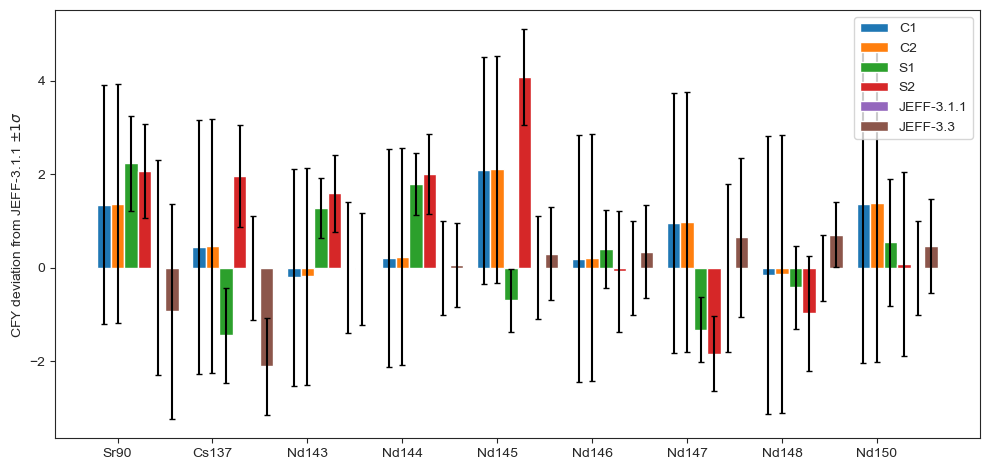

In [119]:
%%capture --no-display
fig, ax = plt.subplots(figsize=(10, 4.8), dpi=100)

vals2 = (vals/vals.iloc[-2] - 1)*100 
err2 = err/vals*100
step = 1 / (vals2.T.columns.size + 1)
for i, LIB in enumerate(vals2.T.columns):
    x = np.arange(vals2.T[LIB].shape[0])
    ax.bar(data=vals2.T[LIB].reset_index(), x=x+i*step, height=LIB, yerr=err2.T[LIB], capsize=2, width=step)
ax.legend(labels=vals2.T.columns)
ticks = ax.get_xticks()
ax.set_xticklabels(vals2.columns.values)
ax.set_xticks(np.arange(len(vals2.columns)) + step)
ax.set(
    ylabel="CFY deviation from JEFF-3.1.1 $\\pm 1\\sigma$",
)
fig.tight_layout();

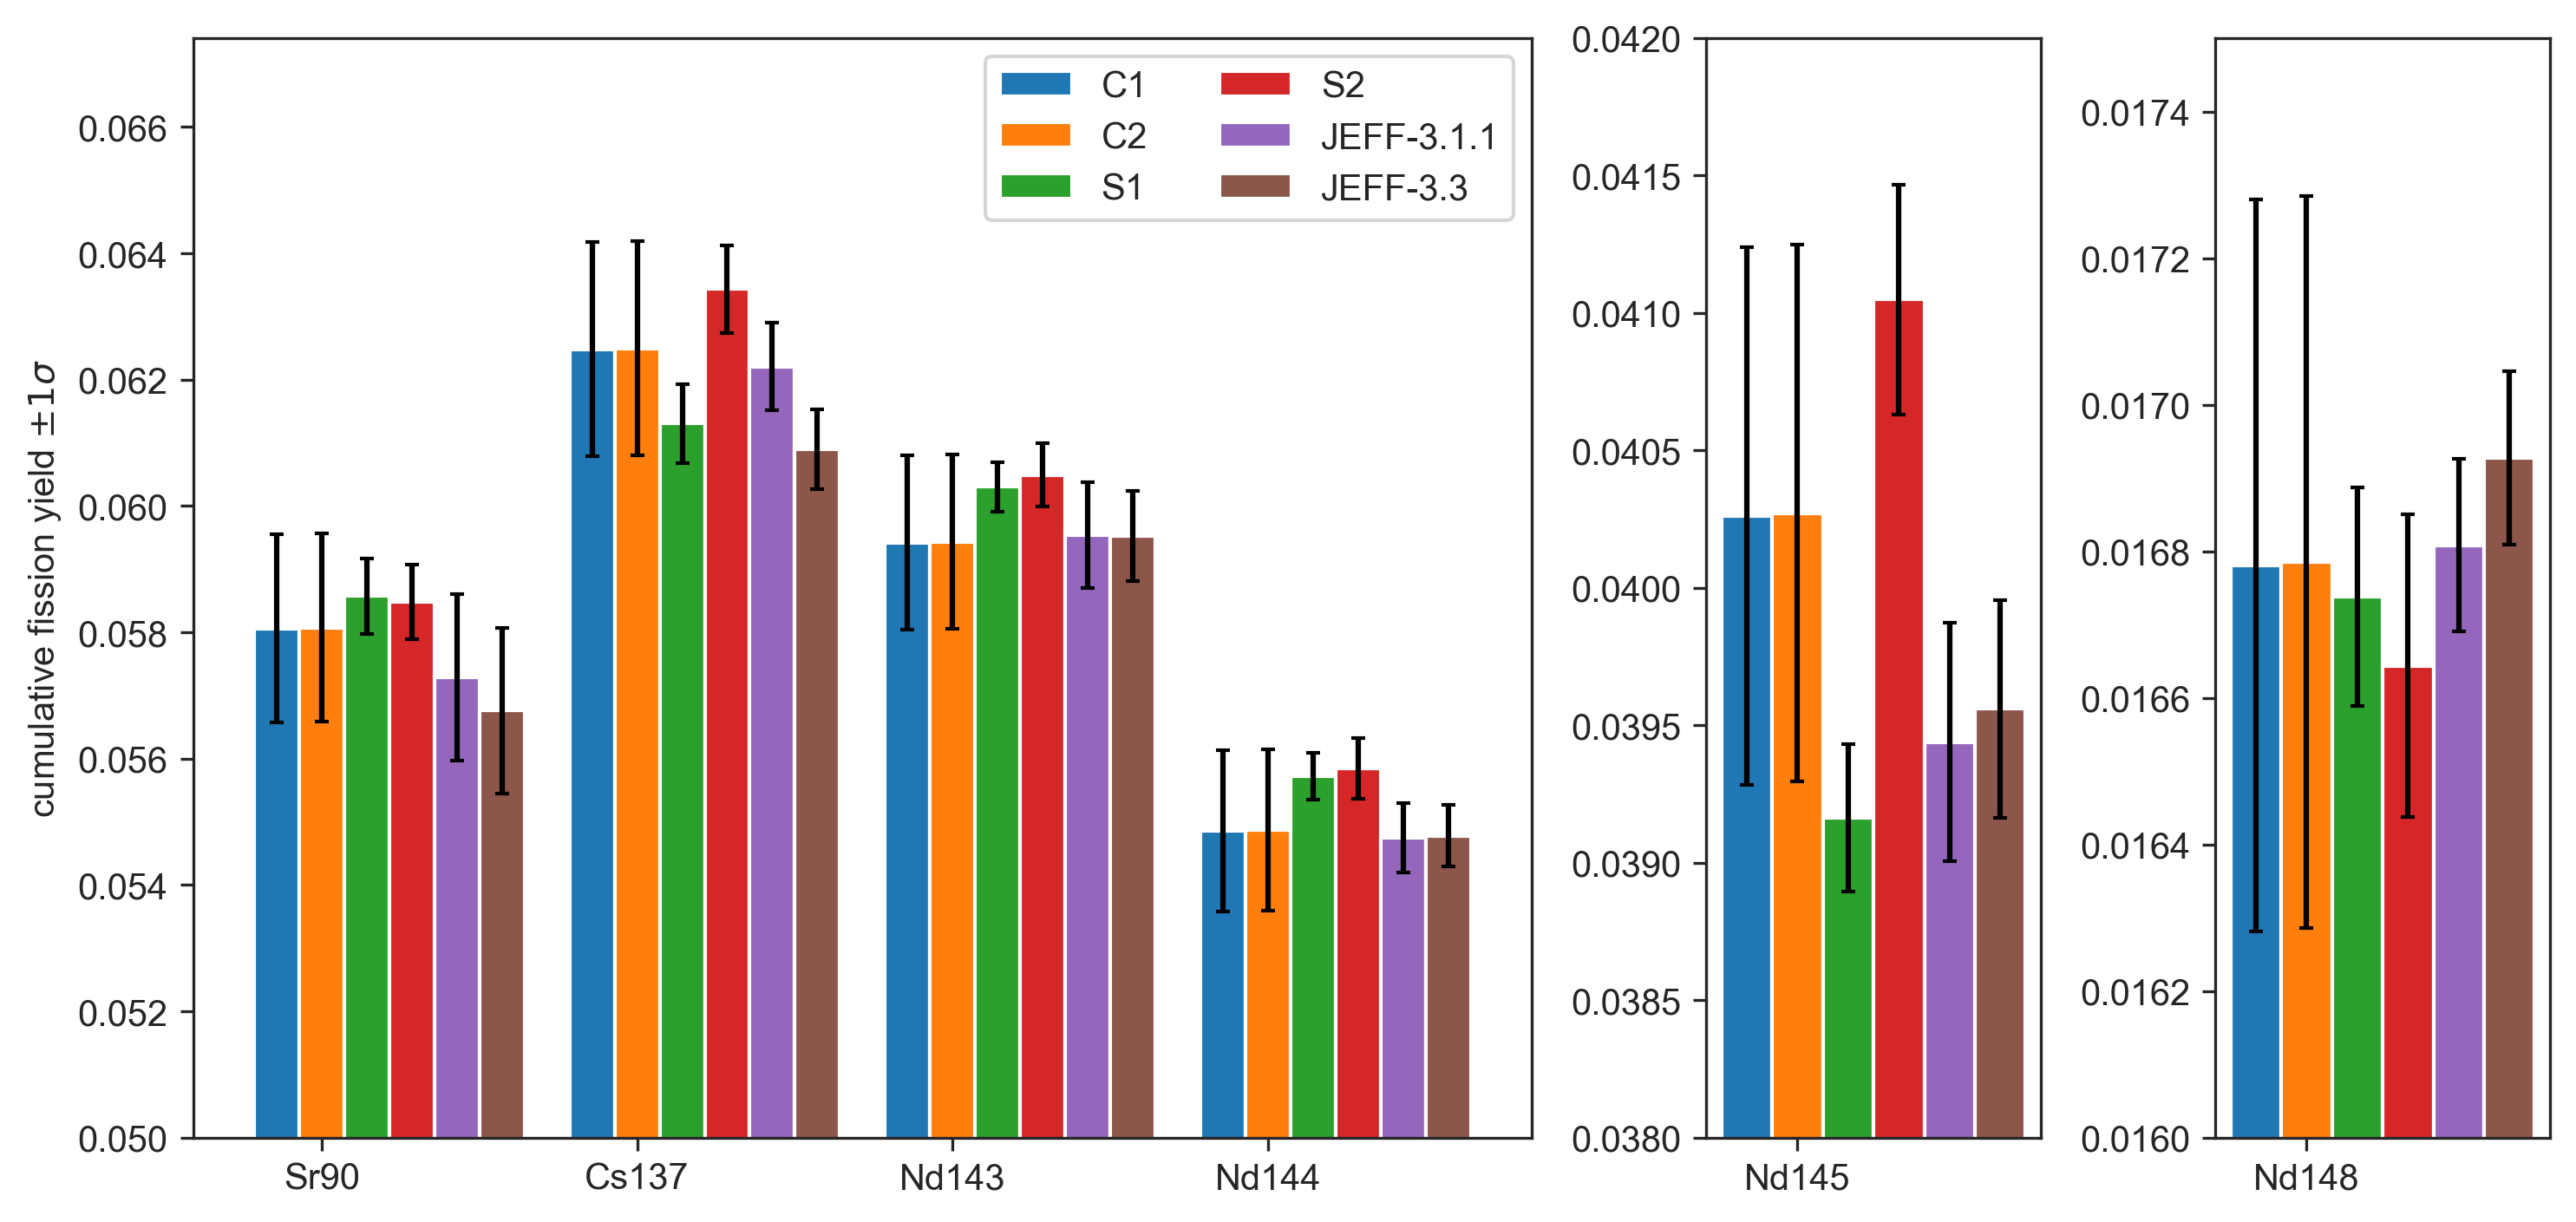

In [123]:
%%capture --no-display
fig, axs = plt.subplots(1, 3, figsize=(10, 4.8), dpi=300, gridspec_kw={'width_ratios': [4, 1, 1]})

ax = axs[0]
vals2 = vals.iloc[:, :4]
err2 = err.iloc[:, :4]
step = 1 / (vals2.T.columns.size + 1)
for i, LIB in enumerate(vals2.T.columns):
    x = np.arange(vals2.T[LIB].shape[0])
    ax.bar(data=vals2.T[LIB].reset_index(), x=x+i*step, height=LIB, yerr=err2.T[LIB], capsize=2, width=step)
ax.legend(labels=vals2.T.columns, ncol=2)
ticks = ax.get_xticks()
ax.set_xticklabels(vals2.columns.values)
ax.set_xticks(np.arange(len(vals2.columns)) + step)
ax.set(
    ylabel="cumulative fission yield $\\pm 1\\sigma$",
    ylim=(.05, None),
)

ax = axs[1]
vals2 = vals.iloc[:, 4:5]
err2 = err.iloc[:, 4:5]
step = 1 / (vals2.T.columns.size + 1)
for i, LIB in enumerate(vals2.T.columns):
    x = np.arange(vals2.T[LIB].shape[0])
    ax.bar(data=vals2.T[LIB].reset_index(), x=x+i*step, height=LIB, yerr=err2.T[LIB], capsize=2, width=step)
ax.legend(labels=vals2.T.columns)
ticks = ax.get_xticks()
ax.set_xticklabels(vals2.columns.values)
ax.set_xticks(np.arange(len(vals2.columns)) + step)
ax.get_legend().remove()
ax.set(
    ylabel=None,
    ylim=(.038, 0.042),
)

ax = axs[2]
vals2 = vals.iloc[:, 7:8]
err2 = err.iloc[:, 7:8]
step = 1 / (vals2.T.columns.size + 1)
for i, LIB in enumerate(vals2.T.columns):
    x = np.arange(vals2.T[LIB].shape[0])
    ax.bar(data=vals2.T[LIB].reset_index(), x=x+i*step, height=LIB, yerr=err2.T[LIB], capsize=2, width=step)
ax.legend(labels=vals2.T.columns)
ticks = ax.get_xticks()
ax.set_xticklabels(vals2.columns.values)
ax.set_xticks(np.arange(len(vals2.columns)) + step)
ax.get_legend().remove()
ax.set(
    ylabel=None,
    ylim=(.016, 0.0175),
)

fig.tight_layout();